In [1]:
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import nltk
from collections import Counter 

In [2]:
df = pd.read_csv("./dcinside_cook.csv")

In [3]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,titles
0,수육삶을건데 편마늘 ㄱㄴ?
1,뉴비)치킨스톡이 닭고기 다시다라고 생각하면됨?
2,이거 보관 어케함??
3,진짜 죄송한데 가스레인지 건전지 어캐 바꿈?
4,스테이크 어느정도로 썰어먹음?


In [19]:
pd.set_option('display.max_colwidth', None)
 
df[df['titles'].str.contains('곰팡이', na=False)]

,titles
23,가래침 같은 흰 곰팡이 ? 버려야하나요 ?
403,자취방 고구마 곰팡이
690,굴소스 입구에 곰팡이 폈는데
772,마늘 곰팡이핀거 5알정도 넣고 닭삶았는데 이거 먹어도됨?
1161,곰팡이가 먹어도되는 음식 이였음? 설명좀 해주실분
1756,아침에 귤에 푸른곰팡이 핀거를 다 보고 치우고출근하네 시발
1872,파프리카 꼭지에 곰팡이 생김
3018,깻잎 장아찌에 흰곰팡이가 핀거 같은데 한번 봐주세요 먹어도 될까요??..
3477,혐) 곰팡이
3702,바질 페스토 곰팡이폈는데 먹어도됨?


In [25]:
gomp = df[df['titles'].str.contains('곰팡이', na=False)]
gomp.shape

(13, 1)

In [4]:
df_counter = Counter(df["titles"])
df_counter.most_common(100)

[('수육삶을건데 편마늘 ㄱㄴ?', 1),
 ('뉴비)치킨스톡이 닭고기 다시다라고 생각하면됨?', 1),
 ('이거 보관 어케함??', 1),
 ('진짜 죄송한데 가스레인지 건전지 어캐 바꿈?', 1),
 ('스테이크 어느정도로 썰어먹음?', 1),
 ('니들 나처럼 매운거 먹으면 심하면 병원가는 병신 봤냐?', 1),
 ('짜장면보다 짜파게티가 더 맛있는 사람이 있음?', 1),
 ('라구', 1),
 ('요라사 여자친구 집밥..', 1),
 ('스텐팬 예열', 1),
 ('가성비 깡패 스뎅팬 찾았다', 1),
 ('요리 위생 질문', 1),
 ('조금 좋은 식초, 소금 뭐 사면되? 각각 한 3마넌 정도씩은 쓸 용의 있', 1),
 ('유튭에서 꽃게액젖만드는 영상보고 바로삿는데', 1),
 ('혼자 사는 애들아 냉장고 김냉 겸용 되는거 뭐 좋은거 없니...?', 1),
 ('디벨라 파스타면들 진짜 좋은거 같은데', 1),
 ('고삐리의 허접한 요리대회 출품준비메뉴', 1),
 ('실례지만 이 당금 상한건가요?', 1),
 ('위스키는 제로 없나?', 1),
 ('5만원 이하 도마 좀 추천해줄 갤럼 있음?', 1),
 ('파마산치즈로 해먹을 음식추천좀', 1),
 ('식품소독 가능한 락스로 텀블러 소독했는데', 1),
 ('프랑스에서 왜 라면이 맛 없는줄 아냐', 1),
 ('가래침 같은 흰 곰팡이 ? 버려야하나요 ?', 1),
 ('시판 양념중에 짜글이와 비슷한거 없음?', 1),
 ('기름 없이 구울수 있나??', 1),
 ('치즈 유통기한 지났는데', 1),
 ('우스타소스없으면 돈까스소스 못만드나??', 1),
 ('서울 마포-강남으로 요리 기초부터 배울곳 추천점..', 1),
 ('새우 브로콜리 소고기 볶음', 1),
 ('혹시 가루가 물을 흡수함?', 1),
 ('형들 오코노미야끼 소스로 야끼소바 만들어도 됨?', 1),
 ('왜 짬뽕을 집에서 하면 순두부찌개맛이 나는겨', 1),
 ('페코리노 로마노 ㅈㄴ 맛있네', 1),
 ('진짜 일식 셰프가 

In [5]:
x = ["'",",", "[","]", "?", "!", "ㅋㅋ", "ㅁㅌㅊ", "..", ".", ")", "vs", "(", "존나", "...", "걍", "그냥", "<", ">", "할", "거", "이", "가", "잘", "좀", "형들", "다", "수", "나", "다","이거","있음","왜","진짜","형님들","됨","님들"]

In [6]:
token_list = []

for doc in tqdm(df["titles"]):
    for token in word_tokenize(doc):
        if token not in x:
            token_list.append(token)

100%|███████████████████████████████████████████████████████████████████████████| 5214/5214 [00:00<00:00, 24546.84it/s]


In [13]:
counter = Counter(token_list)

In [15]:
counter.most_common(100)

[('요리', 210),
 ('파스타', 134),
 ('질문', 99),
 ('추천좀', 78),
 ('집에서', 70),
 ('고기', 70),
 ('어떻게', 67),
 ('소스', 63),
 ('레시피', 61),
 ('스테이크', 60),
 ('스텐팬', 59),
 ('너무', 57),
 ('뭐', 53),
 ('알리오올리오', 50),
 ('혹시', 47),
 ('사람', 46),
 ('더', 45),
 ('하는데', 45),
 ('원래', 44),
 ('추천', 44),
 ('때', 42),
 ('오늘', 42),
 ('안', 37),
 ('토마토', 36),
 ('뭐가', 36),
 ('많이', 35),
 ('요린이', 34),
 ('먹어도', 33),
 ('후라이팬', 32),
 ('소고기', 31),
 ('뭐임', 31),
 ('넣어도', 31),
 ('만든', 31),
 ('올리브유', 31),
 ('계란', 31),
 ('처음', 30),
 ('칼', 30),
 ('아는', 29),
 ('무슨', 28),
 ('카레', 28),
 ('수육', 27),
 ('스파게티', 27),
 ('샀는데', 27),
 ('양파', 27),
 ('알리오', 27),
 ('냉동', 27),
 ('쓰는', 27),
 ('맛', 26),
 ('치즈', 26),
 ('만들어', 26),
 ('넣으면', 26),
 ('어디서', 26),
 ('어떰', 25),
 ('질문좀', 25),
 ('있는데', 25),
 ('삼겹살', 25),
 ('차이', 25),
 ('대신', 25),
 ('만들때', 24),
 ('했는데', 24),
 ('어케', 24),
 ('까르보나라', 24),
 ('볶음밥', 24),
 ('되나요', 24),
 ('있나요', 24),
 ('내가', 23),
 ('싶은데', 23),
 ('치킨', 23),
 ('요즘', 23),
 ('써도', 23),
 ('밥', 22),
 ('좋음', 21),
 ('있는', 21),
 ('자취', 21),
 (

In [17]:
counter = [(word.replace("'", ""), count) for word, count in counter.most_common(100)]

In [43]:
counter

[('요리', 210),
 ('파스타', 134),
 ('질문', 99),
 ('추천좀', 78),
 ('집에서', 70),
 ('고기', 70),
 ('어떻게', 67),
 ('소스', 63),
 ('레시피', 61),
 ('스테이크', 60),
 ('스텐팬', 59),
 ('너무', 57),
 ('뭐', 53),
 ('알리오올리오', 50),
 ('혹시', 47),
 ('사람', 46),
 ('더', 45),
 ('하는데', 45),
 ('원래', 44),
 ('추천', 44),
 ('때', 42),
 ('오늘', 42),
 ('안', 37),
 ('토마토', 36),
 ('뭐가', 36),
 ('많이', 35),
 ('요린이', 34),
 ('먹어도', 33),
 ('후라이팬', 32),
 ('소고기', 31),
 ('뭐임', 31),
 ('넣어도', 31),
 ('만든', 31),
 ('올리브유', 31),
 ('계란', 31),
 ('처음', 30),
 ('칼', 30),
 ('아는', 29),
 ('무슨', 28),
 ('카레', 28),
 ('수육', 27),
 ('스파게티', 27),
 ('샀는데', 27),
 ('양파', 27),
 ('알리오', 27),
 ('냉동', 27),
 ('쓰는', 27),
 ('맛', 26),
 ('치즈', 26),
 ('만들어', 26),
 ('넣으면', 26),
 ('어디서', 26),
 ('어떰', 25),
 ('질문좀', 25),
 ('있는데', 25),
 ('삼겹살', 25),
 ('차이', 25),
 ('대신', 25),
 ('만들때', 24),
 ('했는데', 24),
 ('어케', 24),
 ('까르보나라', 24),
 ('볶음밥', 24),
 ('되나요', 24),
 ('있나요', 24),
 ('내가', 23),
 ('싶은데', 23),
 ('치킨', 23),
 ('요즘', 23),
 ('써도', 23),
 ('밥', 22),
 ('좋음', 21),
 ('있는', 21),
 ('자취', 21),
 (

In [45]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt

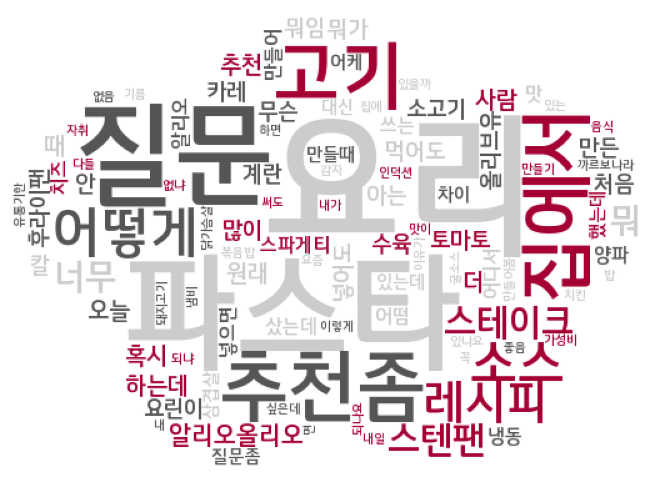

In [49]:
from PIL import Image
from wordcloud import STOPWORDS, ImageColorGenerator

mask_sam = np.array(Image.open('../data/mask-cloud.png'))
# print(mask_sam)

wc = WordCloud(background_color='white', random_state=20, 
               mask = mask_sam, font_path='C://Windows/Fonts/LG_Smart_UI-SemiBold.ttf')
freq_data = counter
freq_dict={k:v for k,v in freq_data}

def lg_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#A50034", "#555555", "#CCCCCC"]  # LG 전자 주요 색상 (빨강, 회색 계열)
    return random.choice(colors)

wc_rs = wc.generate_from_frequencies(freq_dict)

wc.recolor(color_func=lg_color_func)

plt.figure(figsize=(16,6))
plt.imshow(wc_rs)
plt.axis('off')
plt.show()